# Homework 2 - Generalized Hough Transform

## Theory

Task 1: ii

Task 2: i

## Programming

Find object in an image using a template:  
![title](data/template.jpg)
![title](data/query.jpg)

In [1]:
# Group G9
# Huaiyi Dai 408002
# Ruoxiao Wang 462318
# Di Xu 464995
#
#
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from tkinter import N
import cv2
import utils
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def nonMaxSuprression(img, d=5):
    """
    Given an image set all values to 0 that are not
    the maximum in its (2d+1,2d+1)-window

    Parameters
    ----------
    img : ndarray
        an image
    d : int
        for each pixels consider the surrounding (2d+1,2d+1)-window

    Returns
    -------
    result : ndarray

    """
    rows,cols = img.shape
    result = np.zeros((rows,cols))

    # TODO
    for i in range(rows):
        for j in range(cols):   # iterate over pixels
            min_col = max(0, j-d)
            min_row = max(0, i-d)
            max_col = min(cols+1, j+d+1)
            max_row = min(rows+1, i+d+1)
            # iterate over (2d+1,2d+1) neighborhood window
            maxi = img[min_row:max_row,min_col:max_col].max()
            if img[i,j] == maxi:
                result[i,j] = maxi  # store results in new array

    return result

def calcBinaryMask(img, thresh = 0.3):
    """
    Compute the gradient of an image and compute a binary mask
    based on the threshold. Corresponds to O^B in the slides.

    Parameters
    ----------
    img : ndarray
        an image
    thresh : float
        A threshold value. The default is 0.3.

    Returns
    -------
    binary : ndarray
        A binary image.

    """

    # TODO: 
    grad = utils.calcDirectionalGrad(img)   # -compute gradients
    grad_abs = np.abs(grad) 
    rows,cols = img.shape

    result = np.zeros([rows, cols])
    TH = thresh * np.max(grad_abs)  # -threshold gradients 
    for i in range(0, rows):
        for j in range(0, cols):
            if (grad_abs[i, j] < TH):
                result[i, j] = 0
            else:
                result[i, j] = 1

    return result   # -return binary mask


def correlation(img, template):
    """
    Compute a correlation of gradients between an image and a template.
    
    Note:
    You should use the formula in the slides using the fourier transform.
    Then you are guaranteed to succeed.
    
    However, you can also compute the correlation directly. 
    The resulting image must have high positive values at positions
    with high correlation.

    Parameters
    ----------
    img : ndarray
        a grayscale image
    template : ndarray
        a grayscale image of the template

    Returns
    -------
    ndarray
        an image containing the correlation between image and template gradients.
    """
    
    # TODO:
    w, h = template.shape[::-1]
    #print(w,h)
    OB_temp = calcBinaryMask(template, thresh = 0.3)
    #result = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED, None, OB_temp)

    ######
    # -compute gradient of the image
    II_img = utils.calcDirectionalGrad(img)
    # -compute gradient of the template
    OI_temp = utils.calcDirectionalGrad(template)
    T_temp = OI_temp * OB_temp
    # -copy template gradient into larger frame
    rows,cols = II_img.shape
    T_temp_larger = np.zeros((rows,cols), dtype=complex)
    T_temp_larger[0:h, 0:w] = T_temp
    # -apply a circular shift so the center of the original template is in the upper left corner
    temp_shift = utils.circularShift(T_temp_larger, int(w/2), int(h/2))
    # -normalize template
    temp_shift = temp_shift / np.sum(np.abs(temp_shift))
    # -compute correlation
    F_temp = np.fft.fft2(temp_shift).conjugate()
    F_img = np.fft.fft2(II_img)
    result = np.real(np.fft.ifft2(F_img * F_temp))

    return result



def GeneralizedHoughTransform(img, template, angles, scales):
    """
    Compute the generalized hough transform. Given an image and a template.
    
    Parameters
    ----------
    img : ndarray
        A query image
    template : ndarray
        a template image
    angles : list[float]
        A list of angles provided in degrees
    scales : list[float]
        A list of scaling factors

    Returns
    -------
    hough_table : list[(correlation, angle, scaling)]
        The resulting hough table is a list of tuples.
        Each tuple contains the correlation and the corresponding combination
        of angle and scaling factors of the template.
        
        Note the order of these values.
    """
    # TODO:
    angles=np.array(angles)
    scales=np.array(scales)
    hough_table=[]
    for ele1 in angles:
        for ele2 in scales:
            temp = utils.rotateAndScale(template, ele1, ele2)          
            corr = correlation(img, temp)
            hough_table.append([corr,ele1,ele2])

    return hough_table

# Main Program

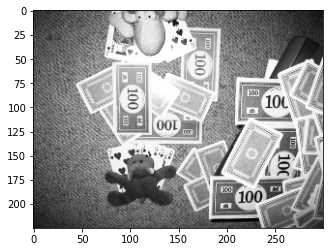

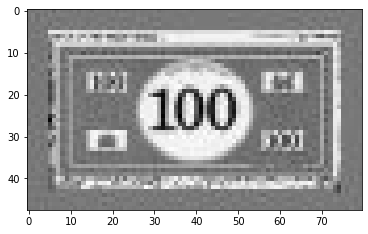

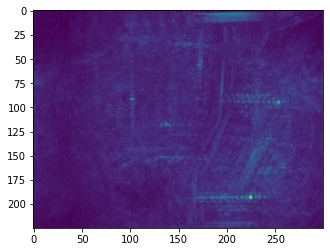

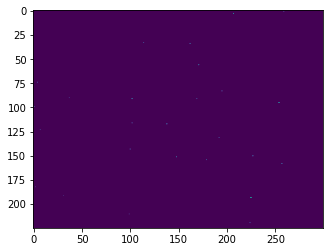

148 151
102 91
207 3
225 193
171 56
227 150
257 158
138 117
162 34
254 95


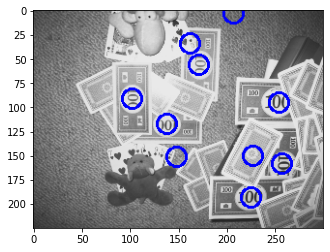

In [2]:
# Load query image and template 
query = cv2.imread("data/query.jpg", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("data/template.jpg", cv2.IMREAD_GRAYSCALE)

# Visualize images
utils.show(query)
utils.show(template)

# Create search space and compute GHT
angles = np.linspace(0, 360, 36)
scales = np.linspace(0.9, 1.3, 10)
ght = GeneralizedHoughTransform(query, template, angles, scales)

# extract votes (correlation) and parameters
votes, thetas, s = zip(*ght)

# Visualize votes
votes = np.stack(votes).max(0)
plt.imshow(votes)
plt.show()

# nonMaxSuprression
votes = nonMaxSuprression(votes, 20)
plt.imshow(votes)
plt.show()

# Visualize n best matches
n = 10
coords = zip(*np.unravel_index(np.argpartition(votes, -n, axis=None)[-n:], votes.shape))
vis = np.stack(3*[query],2)
for y,x in coords:
    print(x,y)
    vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
utils.show(vis)


# Test your implementation

In [3]:
import utils
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

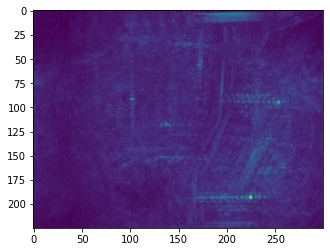

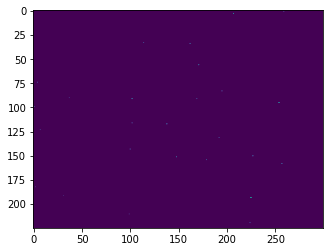

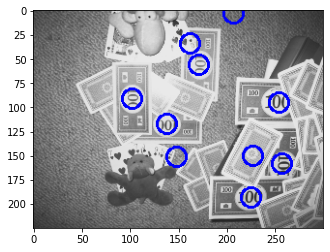

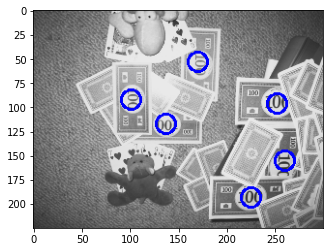

{"scores": {"Correct_Detections": 6}}


In [4]:
from sklearn.metrics.pairwise import euclidean_distances

def testGHT():
    query = cv2.imread("data/query.jpg", cv2.IMREAD_GRAYSCALE)
    template = cv2.imread("data/template.jpg", cv2.IMREAD_GRAYSCALE)
    

    angles = np.linspace(0, 360, 36)
    scales = np.linspace(0.9, 1.3, 10)
    ght = GeneralizedHoughTransform(query, template, angles, scales)
    
    votes, thetas, s = zip(*ght)
    votes = np.stack(votes).max(0)
    plt.imshow(votes)
    plt.show()

    #votes = correlation(query, template)
    votes = nonMaxSuprression(votes, 20)
    plt.imshow(votes)
    plt.show()

    n = 10
    coords = list(zip(*np.unravel_index(np.argpartition(votes, -n, axis=None)[-n:], votes.shape)))

    vis = np.stack(3*[query],2)
    for y,x in coords:
        vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
    utils.show(vis)

    f = open("centroids.txt", "r")
    centroids = f.read()
    f.close()
    
    centroids = centroids.split("\n")[:-1]
    centroids = [centroid.split() for centroid in centroids]
    centroids = np.array([[int(centroid[0]),int(centroid[1])] for centroid in centroids])
    
    vis = np.stack(3*[query],2)
    for x,y in centroids:
        vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
    utils.show(vis)
    
    coords = np.array(coords)[:,::-1]

    
    d = euclidean_distances(centroids, coords).min(1)
    
    correct_detections = np.count_nonzero((d<10))
    
    score = { "scores": {"Correct_Detections": correct_detections }}
    
    print(json.dumps(score))

testGHT()